36 contours found


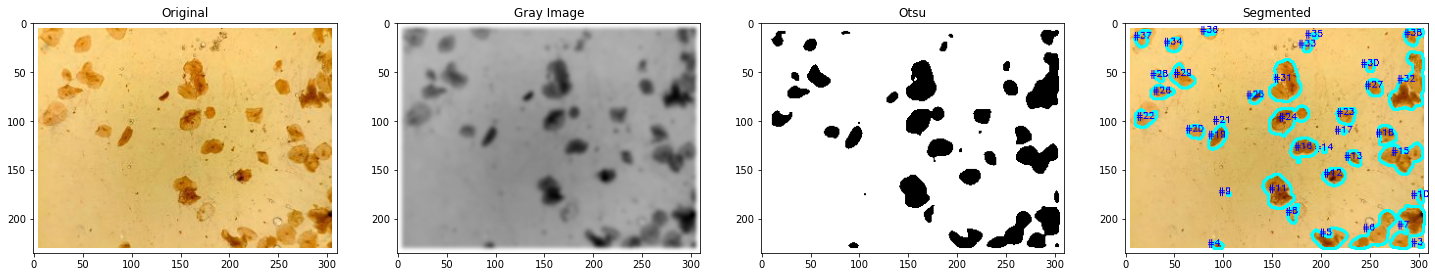

In [2]:
from matplotlib import pyplot as plt
from skimage.segmentation import flood
import cv2 
import imutils


img = cv2.imread("./cell1.jpg")
WHITE = [255,255,255] 

img= cv2.copyMakeBorder(img.copy(),5,5,5,5,cv2.BORDER_CONSTANT,value=WHITE) # for externel countour removing
rawImage= img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(11,11),0)
ret, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)

otsu = cv2.morphologyEx(otsu, cv2.MORPH_OPEN, (11,11))

cnts = cv2.findContours(otsu.copy(), cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("{} contours found".format(len(cnts)-2))

fig, ax = plt.subplots(ncols=4,nrows=1, figsize=(25, 50))
for (i, c) in enumerate(cnts):# draw the contour
    if(i > 1): # for externel countour removing
        ((x, y), _) = cv2.minEnclosingCircle(c)
        cv2.drawContours(img, [c], -1, (0, 255, 255), 2)
        cv2.putText(img, "#{}".format(i + 1), (int(x) - 10, int(y)),
            cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)
        

ax[0].imshow(rawImage, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(gray, cmap=plt.cm.gray)
ax[1].set_title('Gray Image')

ax[2].imshow(otsu, cmap=plt.cm.gray)
ax[2].set_title('Otsu')

ax[3].imshow(img, cmap=plt.cm.gray)
ax[3].set_title('Segmented')

plt.show()

78 contours found


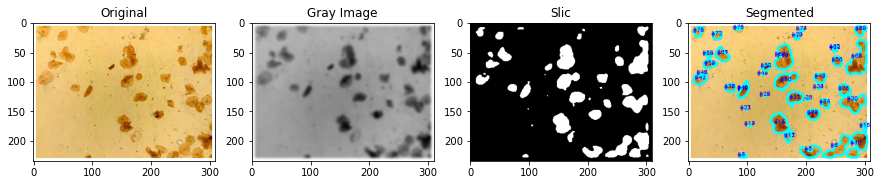

In [9]:
from matplotlib import pyplot as plt
from skimage.segmentation import slic
import cv2 
import imutils


img = cv2.imread("./cell1.jpg")
WHITE = [255,255,255] 

img= cv2.copyMakeBorder(img.copy(),5,5,5,5,cv2.BORDER_CONSTANT,value=WHITE) # for externel countour removing
rawImage= img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(11,11),0)

gimg = slic(gray,n_segments=2,enforce_connectivity=False, compactness=0.0001, start_label=0)

cnts = cv2.findContours(gimg.copy(), cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("{} contours found".format(len(cnts)-2))

fig, ax = plt.subplots(ncols=4,nrows=1, figsize=(15, 10))
for (i, c) in enumerate(cnts):# draw the contour
    if(i > 1): # for externel countour removing
        ((x, y), _) = cv2.minEnclosingCircle(c)
        cv2.drawContours(img, [c], -1, (0, 255, 255), 2)
        cv2.putText(img, "#{}".format(i + 1), (int(x) - 10, int(y)),
            cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)
        


ax[0].imshow(rawImage, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(gray, cmap=plt.cm.gray)
ax[1].set_title('Gray Image')

ax[2].imshow(gimg, cmap=plt.cm.gray)
ax[2].set_title('Slic')

ax[3].imshow(img, cmap=plt.cm.gray)
ax[3].set_title('Segmented')

plt.show()
